<a href="https://colab.research.google.com/github/Alanoudhud/DataMining-Project/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Phase 2 - Part 1: Data Analysis

In this section, we will explore the *Lung Cancer Risk Dataset* to better understand its structure and characteristics before applying any preprocessing or modeling.  
The analysis includes:
- Dataset loading and basic information  
- Missing values analysis  
- Statistical summaries  
- Visualizing distributions and class labels  
- Identifying outliers  


In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load the dataset from the local repository
df = pd.read_csv('https://raw.githubusercontent.com/Alanoudhud/DataMining-Project/refs/heads/main/Dataset/Raw_dataset.csv')



# Display the first few rows to confirm it's loaded correctly
df.head()


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


## 📌 Dataset Overview

Below is the basic information about the dataset, including:
- Number of records (rows)
- Number of attributes (columns)
- Data types for each column
- Presence of missing values

This information helps us understand the structure of the dataset and detect potential issues.


In [92]:
# Display dataset shape: (rows, columns)
print("Dataset Shape:", df.shape)

# Show column names and data types
print("\nData Types:")
print(df.dtypes)

# Display dataset info (including missing values)
print("\nDataset Info:")
df.info()


Dataset Shape: (50000, 11)

Data Types:
patient_id                     int64
age                            int64
gender                        object
pack_years                   float64
radon_exposure                object
asbestos_exposure             object
secondhand_smoke_exposure     object
copd_diagnosis                object
alcohol_consumption           object
family_history                object
lung_cancer                   object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure 

### 🔍 Checking for Missing Values

we examined the dataset to detect missing values.  
Initially, the column `alcohol_consumption` appeared to have many missing entries because Python’s pandas library automatically interprets the text `"None"` as a missing value (`NaN`).  

However, in this dataset, `"None"` is a **valid category** meaning the person does not consume alcohol — not a missing value.  
To fix this, we reloaded the dataset while ensuring that `"None"` is treated as a valid string, not as `NaN`.




Missing values per column (after fix):
patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64


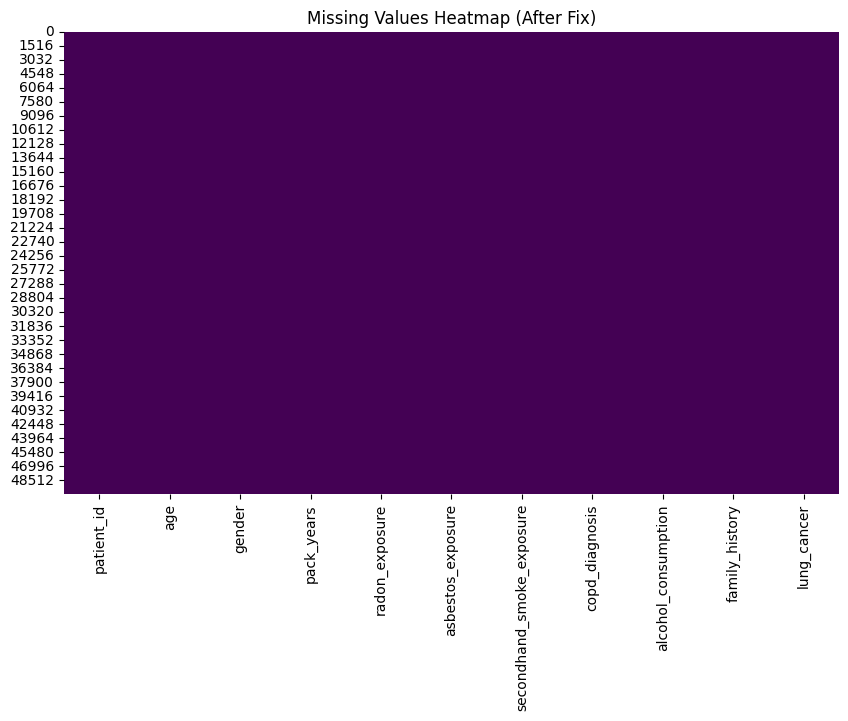

In [93]:
# Read dataset correctly (prevent "None" from being treated as NaN)
df = pd.read_csv('https://raw.githubusercontent.com/Alanoudhud/DataMining-Project/refs/heads/main/Dataset/Raw_dataset.csv', keep_default_na=False, na_values=[""])

# Check again after correction
print("Missing values per column (after fix):")
print(df.isnull().sum())

# Visualize to confirm
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (After Fix)')
plt.show()


### 📝Interpretation Missing Values Analysis

After correcting the interpretation of `"None"`, all columns were confirmed to be complete with no missing values.  
The heatmap below verifies that there are **no missing entries** across any attribute, ensuring data consistency before preprocessing.
.



## 📈 Statistical Summary

For numerical attributes, we will display the **five-number summary** (minimum, Q1, median, Q3, maximum), mean, and standard deviation.  
This helps us understand the distribution and detect outliers or skewed data.


In [94]:
# Select numerical columns
numerical_cols = ['age', 'pack_years']

# Generate statistical summary for numerical attributes
print(df[numerical_cols].describe())


                age    pack_years
count  50000.000000  50000.000000
mean      58.857040     49.963424
std       23.958266     28.852082
min       18.000000      0.002753
25%       38.000000     24.774558
50%       59.000000     50.177634
75%       80.000000     75.066740
max      100.000000     99.999204


## 🧬 Class Label Distribution

The target variable in this dataset is **lung_cancer**, which indicates whether the patient is at risk (`Yes`) or not (`No`).  
We will count and visualize the class distribution to check for class imbalance.


lung_cancer
Yes    34364
No     15636
Name: count, dtype: int64


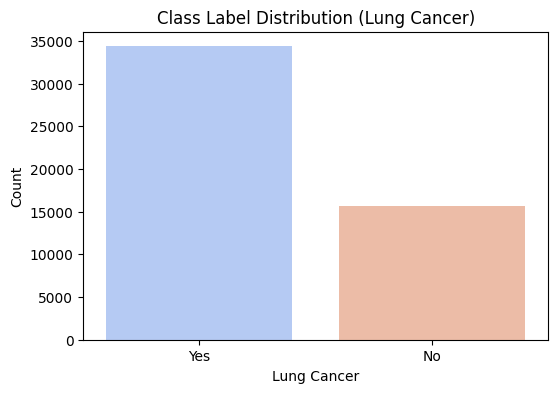

In [95]:
# Count the number of samples in each class
class_counts = df['lung_cancer'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')
plt.title('Class Label Distribution (Lung Cancer)')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


### 📝 Interpretation **Class Label Distribution Analysis**

The chart shows that the number of individuals with lung cancer (**Yes = 34,364**) is much higher than those without (**No = 15,636**), indicating a **class imbalance** in the dataset.  
This imbalance may affect the model’s performance later, so it should be considered during the training phase.


## 📊 Variable Distributions

We use different types of plots to explore data distributions:

- **Histogram** for numerical attributes  
- **Boxplot** to detect outliers  
- **Barplot** for categorical attributes  
- **Hexbin Plot** to visualize dense relationships between two numerical attributes

These visualizations help identify skewness, outliers, potential preprocessing needs, and relationships between variables.



Numeric columns used for histograms: ['age', 'pack_years']


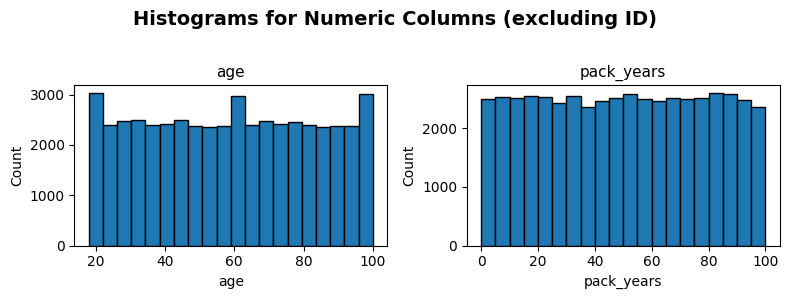

In [96]:
# Histogram for numeric data distribution
# Histograms show how data values are distributed.
# Uneven distributions suggest normalization or preprocessing may be needed.


# --- 1) Pick numeric columns and exclude any ID-like column ---
# Adjust the list below if your ID column has a different name
id_like_names = {"patient_id", "id", "patientid", "record_id"}
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop([c for c in numeric_cols if c.lower() in id_like_names],
                                 errors="ignore")

print("Numeric columns used for histograms:", list(numeric_cols))

# --- 2) Configure grid size based on how many numeric columns you have ---
n = len(numeric_cols)
if n == 0:
    raise ValueError("No numeric columns found (after excluding ID).")
cols = 3 if n >= 3 else n                     # up to 3 plots per row
rows = int(np.ceil(n / cols))

# --- 3) Draw histograms in a tidy grid ---
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = np.atleast_1d(axes).ravel()            # flatten axes array

for ax, col in zip(axes, numeric_cols):
    # dropna() to avoid NaNs affecting the histogram
    ax.hist(df[col].dropna(), bins=20, edgecolor="black")
    ax.set_title(col, fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Hide any unused subplot axes (if grid has more cells than columns)
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

fig.suptitle("Histograms for Numeric Columns (excluding ID)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])        # leave room for the big title
plt.show()





### 🧩 Interpretation

The histograms for **Age** and **Pack_Years** show how the participants are distributed across these numeric attributes.  
Both distributions appear **relatively uniform**, with bars of similar height and no clear peaks or gaps.  
This indicates that the data values are spread fairly evenly across their ranges, meaning there is **no major bias or imbalance** in any specific interval.  
Such uniform distribution is common in **synthetic datasets**, where the data is generated to cover all possible ranges evenly.  
Therefore, no normalization or resampling is required for these attributes at this stage.


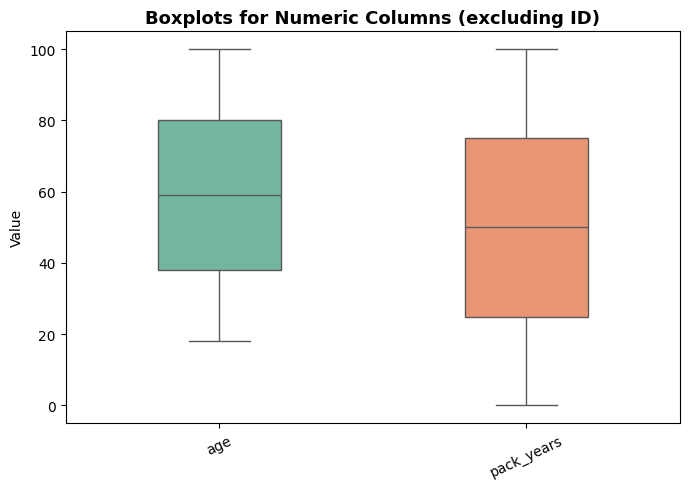

In [97]:
# Boxplots for numeric columns (excluding ID)
num_cols = ['age', 'pack_years']

plt.figure(figsize=(7,5))  # slightly wider to show outliers clearly
sns.boxplot(
    data=df[num_cols],
    orient='v',
    width=0.4,
    palette="Set2",
    showfliers=True,                # show outliers
    flierprops=dict(marker='o', color='red', alpha=0.6)  # red outliers
)
plt.title("Boxplots for Numeric Columns (excluding ID)", fontsize=13, fontweight="bold")
plt.ylabel("Value")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()








### 📊 Interpretation

The boxplots for **Age** and **Pack_Years** display the spread and central tendency of the numeric attributes.  
For **Age**, most values range roughly between 30 and 80, with a median around the middle range — indicating that participants are fairly well distributed across different age groups.  
For **Pack_Years**, the values span from 0 to nearly 100, with a median near 25. This suggests that about half of the participants have low to moderate smoking exposure, while the other half show higher levels of exposure.  
The wide range in **Pack_Years** represents varying levels of smoking habits among individuals, from non-smokers to heavy smokers.  
No clear extreme outliers are observed in either attribute, meaning the data is well-balanced and suitable for further analysis.




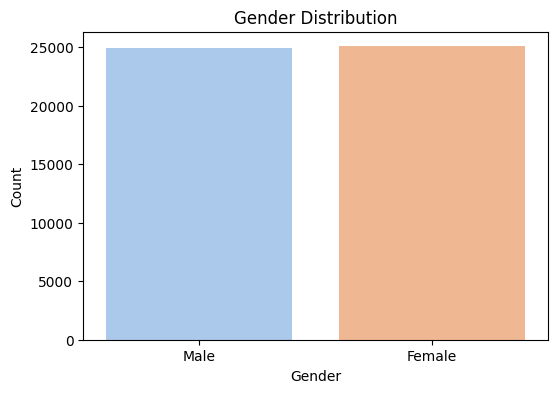

In [98]:
# Barplot for 'gender'
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Interpretation
The bar plot for **Gender Distribution** shows that the dataset contains a nearly balanced number of male and female participants.
The counts for both categories are very close, indicating that there is no significant gender imbalance.
This balance ensures that gender-related patterns in the analysis won’t be biased toward one group.


## 🧭 Hexbin Plot: Age vs. Pack Years

The hexbin plot below helps visualize the relationship between participants' age and their pack years (smoking exposure) in a dense dataset.  
This plot is useful for identifying trends, clusters, and data density patterns that might be unclear in scatter plots due to overlapping points.


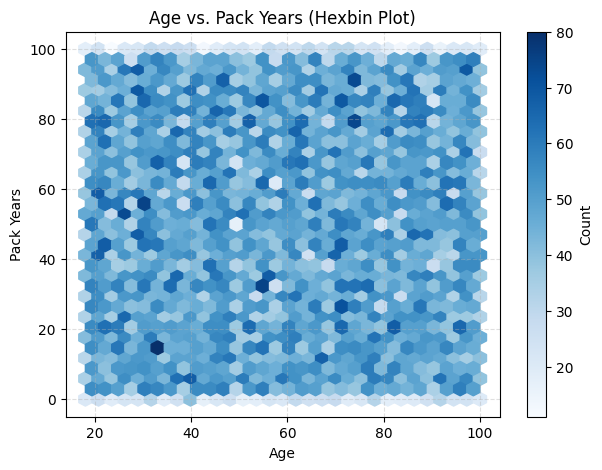

In [99]:
# Hexbin plot to visualize dense data between Age and Pack Years
plt.figure(figsize=(7,5))
plt.hexbin(df['age'], df['pack_years'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar to interpret density
plt.colorbar(label='Count')

# Titles and labels
plt.title('Age vs. Pack Years (Hexbin Plot)')
plt.xlabel('Age')
plt.ylabel('Pack Years')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()




### **Interpretation**

The hexbin plot for **Age vs. Pack Years** provides a clearer view of the data distribution compared to a traditional scatter plot. The data points are spread widely across both axes, and there are no strong visible clusters or patterns. This suggests that smoking exposure (pack years) is distributed across different age groups without a strong linear relationship. The varying color intensity indicates differences in data density, but the overall spread appears uniform, meaning the relationship between age and smoking exposure is relatively weak or non-linear.




## 📝 Observations and Insights

- **Variable Distributions:**  
  The **Age** variable is evenly distributed across different groups, while **Pack Years** ranges from 0 to around 100, with most values concentrated between 25 and 75 and no clear extreme outliers. **Gender** distribution is roughly balanced between males and females.

- **Missing Values:**  
  Initially, missing values appeared mainly in the `alcohol_consumption` column (around 16,662 entries).  
However, after reviewing the dataset structure, it was found that these entries contained the literal value `"None"`,  
which represents "no alcohol consumption" — not truly missing data.  
This means there were **no actual missing values**, and the dataset was already complete and consistent.

- **Statistical Summary:**  
  The numerical attributes show clear ranges and good variability, which will make normalization or standardization easier in later steps.

- **Class Label Distribution:**  
  The **lung_cancer** variable is not perfectly balanced (the number of “Yes” cases is higher than “No”), which should be considered during modeling.

- **Hexbin Plot:**  
  The hexbin plot helped clarify the relationship between **Age** and **Pack Years** better than a regular scatter plot, revealing natural variations in smoking levels across age groups.

---

_End of Part 1: Data Analysis_

## 🧩 Part 2: Data Preprocessing

In this part, several preprocessing techniques were applied to clean and prepare the dataset for analysis and prediction.  
The main objective was to ensure that all data are complete, consistent, and suitable for machine learning models.  

We applied **three preprocessing techniques**, each addressing a different aspect of data quality:

1. **Discretization (Age)** – to convert continuous numeric age values into three categorical groups (Young, Middle-aged, Senior), simplifying interpretation and pattern detection.  
2. **Encoding (Categorical Variables)** – to transform text-based attributes such as *Yes/No*, *Male/Female*,  *Low/Medium/High* and *None/Moderate/Heavy* into numerical values that can be understood by the model.  
3. **Normalization (pack_years)** – to scale numeric values within the range [0, 1] using Min-Max Scaling, allowing all features to contribute equally during model training.  

After completing these steps, the preprocessed dataset was saved as **`lung_cancer_preprocessed.csv`**, ready for the next phase of modeling and analysis.



In [100]:
# Create a copy of the dataset for preprocessing
df_preprocessed = df.copy()

# 🧩 TECHNIQUE 1: Discretization (Age)

In [101]:
# Define bins and labels for age groups
bins = [0, 40, 65, 100]
labels = ['Young', 'Middle-aged', 'Senior']

# Apply discretization and replace the original 'age' column
df_preprocessed['age'] = pd.cut(df_preprocessed['age'], bins=bins, labels=labels, include_lowest=True)

# Display the first 5 rows to verify
df_preprocessed[['age']].head()

,age
0,Senior
1,Young
2,Senior
3,Senior
4,Young


In this technique, the numeric 'age' attribute was transformed into three categorical groups:  
**Young (0–40)**, **Middle-aged (41–65)**, and **Senior (66–100)**.  
This discretization helps simplify the analysis by grouping similar age ranges together,  
making it easier to compare trends and patterns between different age categories.  
It also reduces noise and supports better interpretability for classification and prediction models.


# 🧩 TECHNIQUE 2:ENCODING

In [ ]:
# Technique 2: Encoding


# 1) Encode all TRUE binary columns (Yes/No → 1/0)
binary_cols = [
    'family_history',
    'copd_diagnosis',
    'asbestos_exposure',
    'secondhand_smoke_exposure'

]
for col in binary_cols:
    if col in df_preprocessed.columns:
        df_preprocessed[col] = df_preprocessed[col].map({'Yes': 1, 'No': 0})
        # If any unexpected values exist, keep them as-is (prevents crashing)
        if df_preprocessed[col].isna().any():
            print(f"[warn] Unexpected values in {col} left as NaN.")

# 2) Encode gender (Female → 0, Male → 1)
if 'gender' in df_preprocessed.columns:
    df_preprocessed['gender'] = df_preprocessed['gender'].map({'Female': 0, 'Male': 1})

# 3) Ordinal encoding for ordered categoricals
#    alcohol_consumption: None < Moderate < Heavy
if 'alcohol_consumption' in df_preprocessed.columns:
    alcohol_map = {'None': 0, 'Moderate': 1, 'Heavy': 2}
    df_preprocessed['alcohol_consumption'] = df_preprocessed['alcohol_consumption'].map(alcohol_map)

#    radon_exposure: Low < Medium < High
if 'radon_exposure' in df_preprocessed.columns:
    radon_map = {'Low': 0, 'Medium': 1, 'High': 2}
    df_preprocessed['radon_exposure'] = df_preprocessed['radon_exposure'].map(radon_map)

# 4) (Optional) One-Hot for age_group if you created it earlier as categories
#    This avoids imposing a numeric order on the age buckets.
if 'age_group' in df_preprocessed.columns:
    if str(df_preprocessed['age_group'].dtype).startswith('category') or df_preprocessed['age_group'].dtype == object:
        df_preprocessed = pd.get_dummies(df_preprocessed, columns=['age_group'], drop_first=True)

# 5) Quick sanity checks
print("\nEncoded preview:")
cols_to_show = [c for c in [
    'gender','family_history','copd_diagnosis','asbestos_exposure',
    'secondhand_smoke_exposure','alcohol_consumption','radon_exposure'
] if c in df_preprocessed.columns] + [c for c in df_preprocessed.columns if c.startswith('age_group_')]

display(df_preprocessed[cols_to_show].head())

print("\nDtypes after encoding:")
print(df_preprocessed[cols_to_show].dtypes)



Encoded preview:


,gender,family_history,copd_diagnosis,asbestos_exposure,secondhand_smoke_exposure,alcohol_consumption,radon_exposure
0,1,0,1,0,0,1,2
1,0,1,1,0,1,1,2
2,0,0,1,1,1,0,1
3,0,0,0,0,1,1,0
4,0,1,1,1,0,0,1



Dtypes after encoding:
gender                       int64
family_history               int64
copd_diagnosis               int64
asbestos_exposure            int64
secondhand_smoke_exposure    int64
alcohol_consumption          int64
radon_exposure               int64
dtype: object


In [102]:
# =========================
# Technique 2: Encoding
# =========================



# --- 1) Encode binary Yes/No columns -> 1/0
binary_cols = [
    'family_history',
    'copd_diagnosis',
    'asbestos_exposure',
    'secondhand_smoke_exposure'
]

for col in binary_cols:
    if col in df_preprocessed.columns:
        # normalize text (strip spaces, lower-case) then map
        df_preprocessed[col] = (
            df_preprocessed[col]
            .astype(str).str.strip().str.lower()
            .map({'yes': 1, 'no': 0})
        )
        # warn if something didn't map (becomes NaN)
        if df_preprocessed[col].isna().any():
            print(f"[warn] Unmapped values in '{col}' were set to NaN.")

# --- 2) Encode gender: Female -> 0, Male -> 1
if 'gender' in df_preprocessed.columns:
    df_preprocessed['gender'] = (
        df_preprocessed['gender']
        .astype(str).str.strip().str.lower()
        .map({'female': 0, 'male': 1})
    )
    if df_preprocessed['gender'].isna().any():
        print("[warn] Unmapped values in 'gender' were set to NaN.")

# --- 3) Ordinal encoding for ordered categoricals
# alcohol_consumption: None < Moderate < Heavy
if 'alcohol_consumption' in df_preprocessed.columns:
    df_preprocessed['alcohol_consumption'] = (
        df_preprocessed['alcohol_consumption']
        .astype(str).str.strip().str.lower()
        .map({'none': 0, 'moderate': 1, 'heavy': 2})
    )
    if df_preprocessed['alcohol_consumption'].isna().any():
        print("[warn] Unmapped values in 'alcohol_consumption' were set to NaN.")

# radon_exposure: Low < Medium < High
if 'radon_exposure' in df_preprocessed.columns:
    df_preprocessed['radon_exposure'] = (
        df_preprocessed['radon_exposure']
        .astype(str).str.strip().str.lower()
        .map({'low': 0, 'medium': 1, 'high': 2})
    )
    if df_preprocessed['radon_exposure'].isna().any():
        print("[warn] Unmapped values in 'radon_exposure' were set to NaN.")



# --- 4) Encoding Age column
#     Original levels: Young, Middle-age, Senior -> 0/1/2
if 'age' in df_preprocessed.columns:
    df_preprocessed['age'] = (
        df_preprocessed['age']
        .astype(str)
        .str.strip()
        .str.lower()             #  lowercase
        .map({'young': 0, 'middle-aged': 1, 'senior': 2})
    )


# --- 5) Quick sanity checks
print("\nEncoded preview:")
cols_to_show = [c for c in [
    'age', 'gender', 'family_history', 'copd_diagnosis', 'asbestos_exposure',
    'secondhand_smoke_exposure', 'alcohol_consumption', 'radon_exposure'
] if c in df_preprocessed.columns] + [c for c in df_preprocessed.columns if c.startswith('age_group_')]

display(df_preprocessed[cols_to_show].head())

print("\nDtypes after encoding:")
print(df_preprocessed[cols_to_show].dtypes)



Encoded preview:


,age,gender,family_history,copd_diagnosis,asbestos_exposure,secondhand_smoke_exposure,alcohol_consumption,radon_exposure
0,2,1,0,1,0,0,1,2
1,0,0,1,1,0,1,1,2
2,2,0,0,1,1,1,0,1
3,2,0,0,0,0,1,1,0
4,0,0,1,1,1,0,0,1



Dtypes after encoding:
age                          int64
gender                       int64
family_history               int64
copd_diagnosis               int64
asbestos_exposure            int64
secondhand_smoke_exposure    int64
alcohol_consumption          int64
radon_exposure               int64
dtype: object


In [103]:
print("Unique values in alcohol_consumption after encoding:")
print(df_preprocessed['alcohol_consumption'].unique())


Unique values in alcohol_consumption after encoding:
[1 0 2]


### Technique 2— Encoding

We encoded all categorical attributes to make the dataset fully numeric for classification:

- **Binary columns (Yes/No → 1/0):** `family_history`, `copd_diagnosis`, `asbestos_exposure`, `secondhand_smoke_exposure`.
- **Gender:** encoded as **Female = 0**, **Male = 1**.
- **Ordered categoricals (ordinal encoding):**
  - `alcohol_consumption`: **None = 0 < Moderate = 1 < Heavy = 2**
  - `radon_exposure`: **Low = 0 < Medium = 1 < High = 2**
- **(Optional) `age_group`:** one-hot encoded (e.g., `age_group_Middle-aged`, `age_group_Senior`) to avoid imposing an artificial numeric order.

This strategy preserves natural ordering where it exists (exposure/severity), avoids unintended biases, and prepares a clean numeric feature matrix for the classifier.


# 🧩 TECHNIQUE 3:NORMALIZATION  (pack_years)

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Apply normalization only to the 'pack_years' column
df_preprocessed[['pack_years']] = scaler.fit_transform(df_preprocessed[['pack_years']])

# Display first 5 rows to verify
df_preprocessed[['pack_years']].head()

# 1) Tolerant range check for [0,1]
import numpy as np
eps = 1e-9
min_val = df_preprocessed['pack_years'].min()
max_val = df_preprocessed['pack_years'].max()
print("Min:", min_val, "Max:", max_val)
ok = ((df_preprocessed['pack_years'] >= -eps) &
      (df_preprocessed['pack_years'] <= 1 + eps)).all()
print("Within [0,1] with tolerance?", ok)



# 2) Hard clamp to [0,1] (just in case)
df_preprocessed['pack_years'] = df_preprocessed['pack_years'].clip(0, 1)


# 3) Find any truly out-of-range values (after normalization)
bad = df_preprocessed.loc[
    (df_preprocessed['pack_years'] < 0 - 1e-9) |
    (df_preprocessed['pack_years'] > 1 + 1e-9),
    'pack_years'
]
print("Out-of-range count:", bad.shape[0])
print(bad.head())


# ✅ Verify normalization range for 'pack_years'
print("Min value:", df_preprocessed['pack_years'].min())
print("Max value:", df_preprocessed['pack_years'].max())

# Optional check – all values between 0 and 1?
is_in_range = ((df_preprocessed['pack_years'] >= 0) & (df_preprocessed['pack_years'] <= 1)).all()
print("All values within [0,1] range?", is_in_range)


Min: 0.0 Max: 1.0
Within [0,1] with tolerance? True
Out-of-range count: 0
Series([], Name: pack_years, dtype: float64)
Min value: 0.0
Max value: 1.0
All values within [0,1] range? True


### ✅ Normalization Summary

The `pack_years` feature was normalized using the **Min-Max Scaling** technique to ensure all values fall within the standard range [0, 1].  
After applying the transformation, verification confirmed that:  
- The minimum value is **0.0**  
- The maximum value is **1.0**  
- All records are within the [0, 1] range with no out-of-range values  

This normalization step ensures that the `pack_years` variable contributes proportionally during model training and prevents features with larger numeric ranges from dominating others.


Double-click (or enter) to edit

In [105]:
# 💾 Save the preprocessed dataset to a new CSV file
df_preprocessed.to_csv('lung_cancer_preprocessed.csv', index=False)

print("✅ Preprocessed dataset saved successfully as 'lung_cancer_preprocessed.csv'")

✅ Preprocessed dataset saved successfully as 'lung_cancer_preprocessed.csv'


### ✅ Exporting the Preprocessed Dataset

The cleaned and preprocessed dataset was successfully saved as a new CSV file named **`lung_cancer_preprocessed.csv`**.  
This file contains all transformations — including discretization, encoding, and normalization — ensuring the data is ready for the next phase of analysis or model training.


In [106]:
from google.colab import files
files.download('lung_cancer_preprocessed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>